# Foundation Data Sciences
## Week 07: Linear Models

**Learning outcomes:** 
In this lab you will learn to apply linear regression to data sets and evaluate your model. By the end of the lab you will be able to 
* Apply the linear regression using the statsmodels package
* Interpret some of the visual and numerical diagnostics from the package
* Transform variables to produce a better model of the data
* Apply multiple regression to some data

**Prerequisites:** We expect you to have understood the underlying theory of single and multiple linear regression, and we won't repeat it in this lab. If something is unclear check the course material.

Insulin is a hormone that regulates glucose levels in the body. In people with diabetes, the body does not produce enough insulin or doesn't respond to it normally, so glucose levels can become dangerously high. Some people with certain types of diabetes prevent their glucose levels becoming too high by injecting themselves with insulin. The first question we are going to try to answer is:

**Research question 1:** Can we predict the insulin level of a diabetic patient by measuring the glucose concentration in their bloodstream?

Insulin is typically injected in subcutaneous tissue.  However, if  incorrectly injected it can end up in muscle tissue instead. In this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3897752/), researchers tried to understand the effects of age, sex, body mass index (BMI), and anatomical site on skin thickness. Being able to predict the skin thickness helps to find the optimal site for e.g. subcutaneous injections. We will try to answer this question using the diabetes data set from Lab 04.

**Research question 2:** Can we give a good estimate of the skin thickness, given age and BMI?

**Data description:** See the Week 05 lab.

**Remarks:**
- For some exercises you might need to use google, StackOverflow or the official package documentation. It is important to get familiar with looking up how to solve problems online. Throughout your career you will encounter many problems that other people have encountered too; there is no need to reinvent the wheel.
- We will not provide all the code in the tutorials, but expect you to be able to draw from previous labs to fill in gaps.
- Try not to use copy+paste when coding these labs, as typing will help you memorize the code better.
- Try to understand each detail in the code we provide, and read the comments!


## 7.A: Data preparation and exploration

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

We can now start by loading the data we will use in this lab.

**Exercise 01:** 

a) Load the following datasets:
- `diabetes.csv` from `datasets` and store as `diabetes_raw`

b) Plot a pairplot of the `diabetes_raw` dataset. Use two different colours to colour the patients with diabetes and without diabetes differently.

In [10]:
# Your code
# a
diabetes_raw = pd.read_csv('datasets/diabetes.csv')
diabetes_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


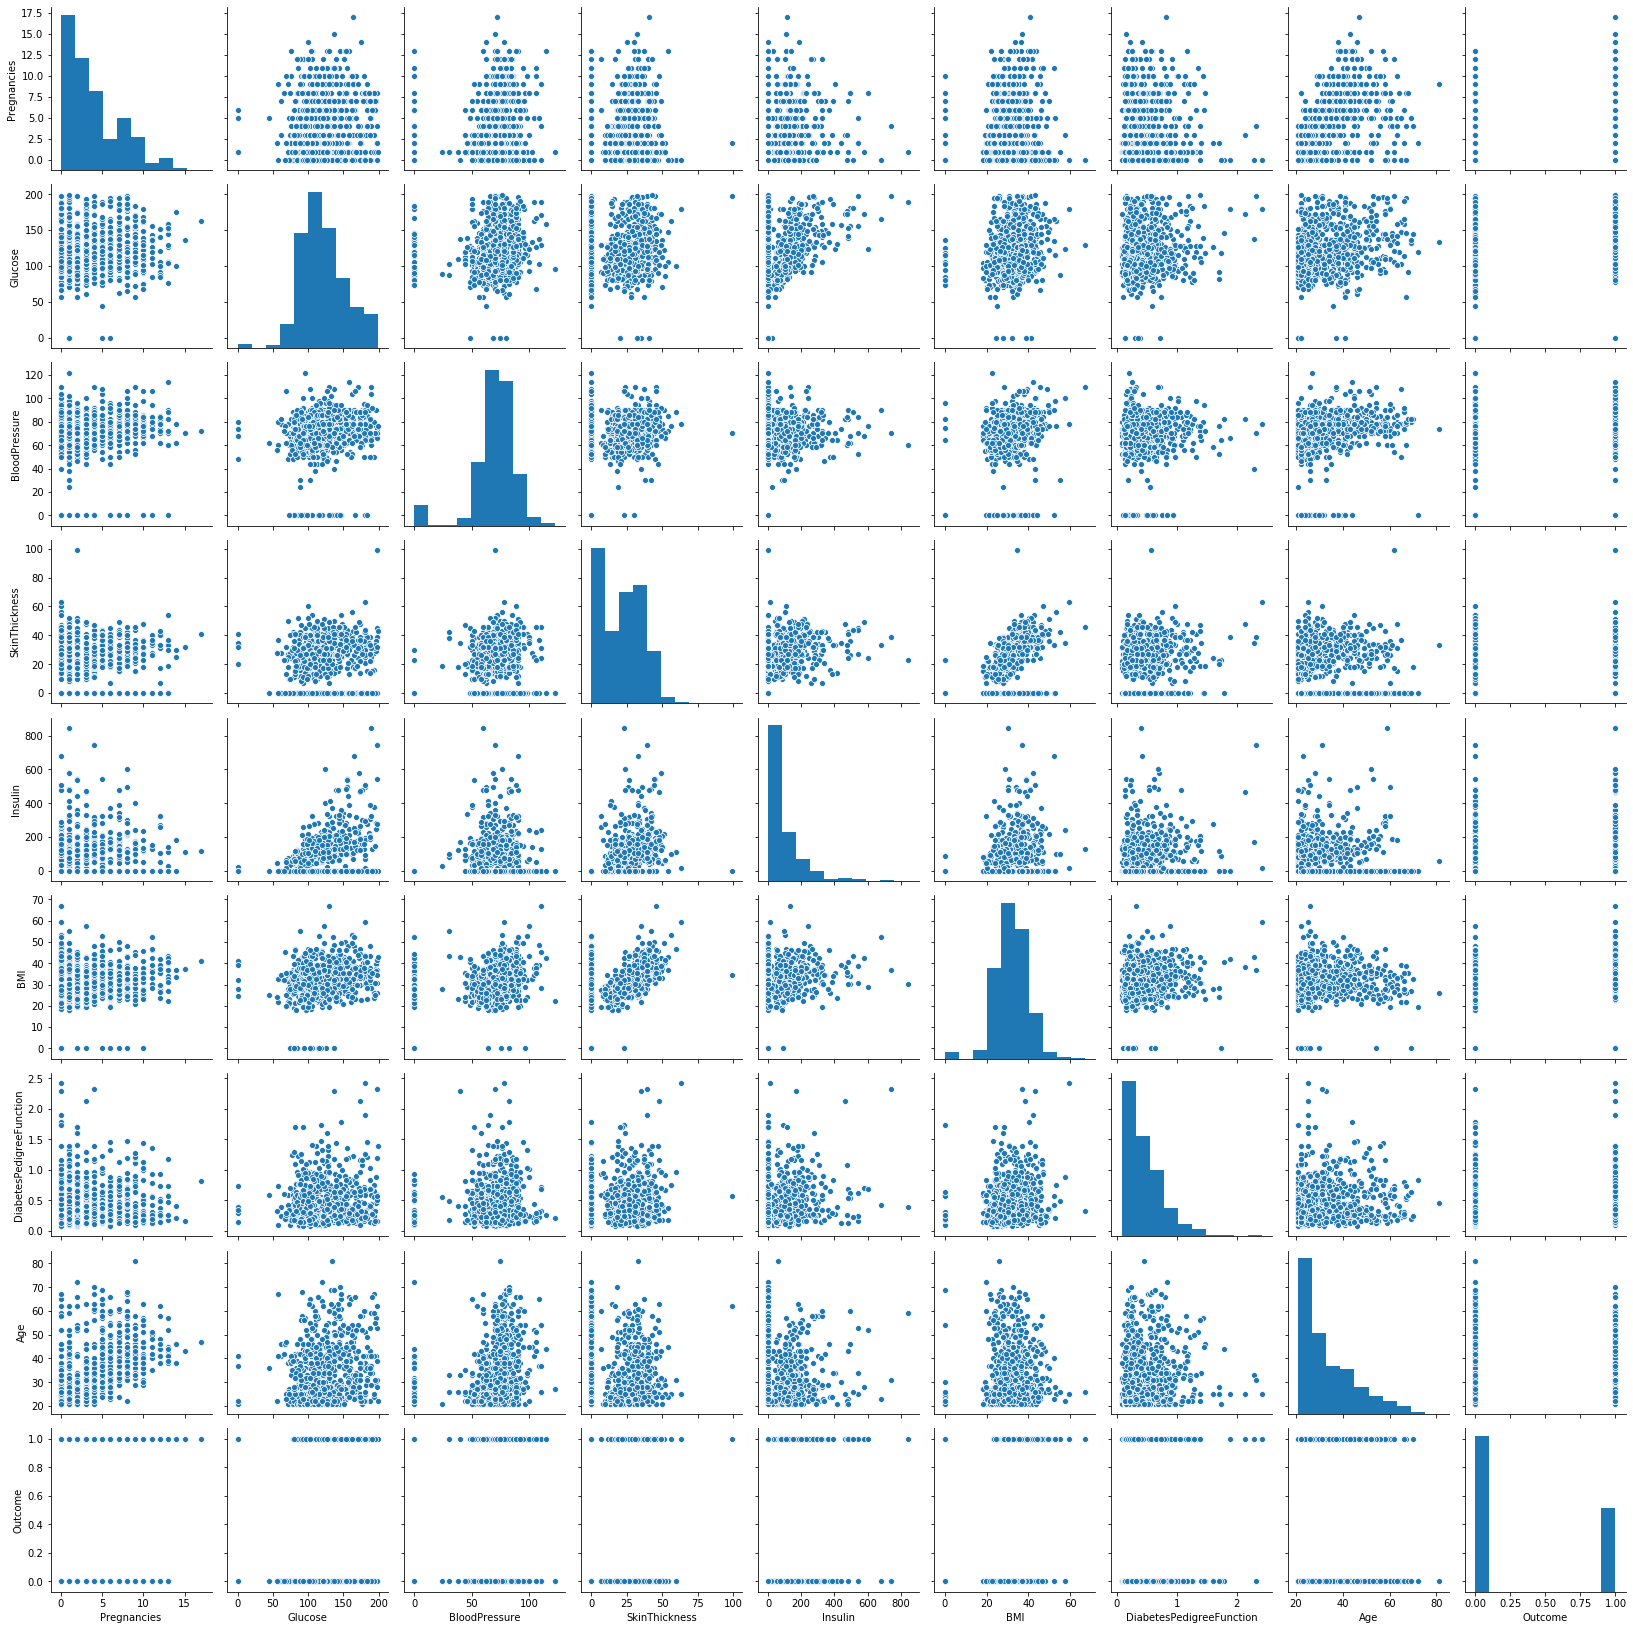

In [11]:
# b
sns.pairplot(diabetes_raw)
plt.show()

Insulin is a hormone helping in the regulation of glucose in your blood. It signals that excess glucose should be stored as glycogen. When your body needs energy, glucagon, a different hormone, transforms glycogen back into energy. Diabetes is characterized by a misfunction of insulin in your body. In type 1 diabetes the body cannot produce sufficient insulin, while in type 2 diabetes the body does not respond efficiently to insulin. Knowing the above, we would expect that diabetic people have a higher glucose level. Let's check it. 

If you look at the data carefully, you will see that there are a lot of data entries that are `0.0` that don't make sense biologically for BMI, skin thickness, glucose or insulin. The documentation about the dataset doesn't explain what the coding for these values are so we'll have to assume that they are missing values, and remove them. Let's clean the data as follows:

**Exercise 02:**
- Clean the data set by removing all observations where any of the BMI, skin thickness, Glucose, Insulin are zero. Save your dataset as `diabetes`.

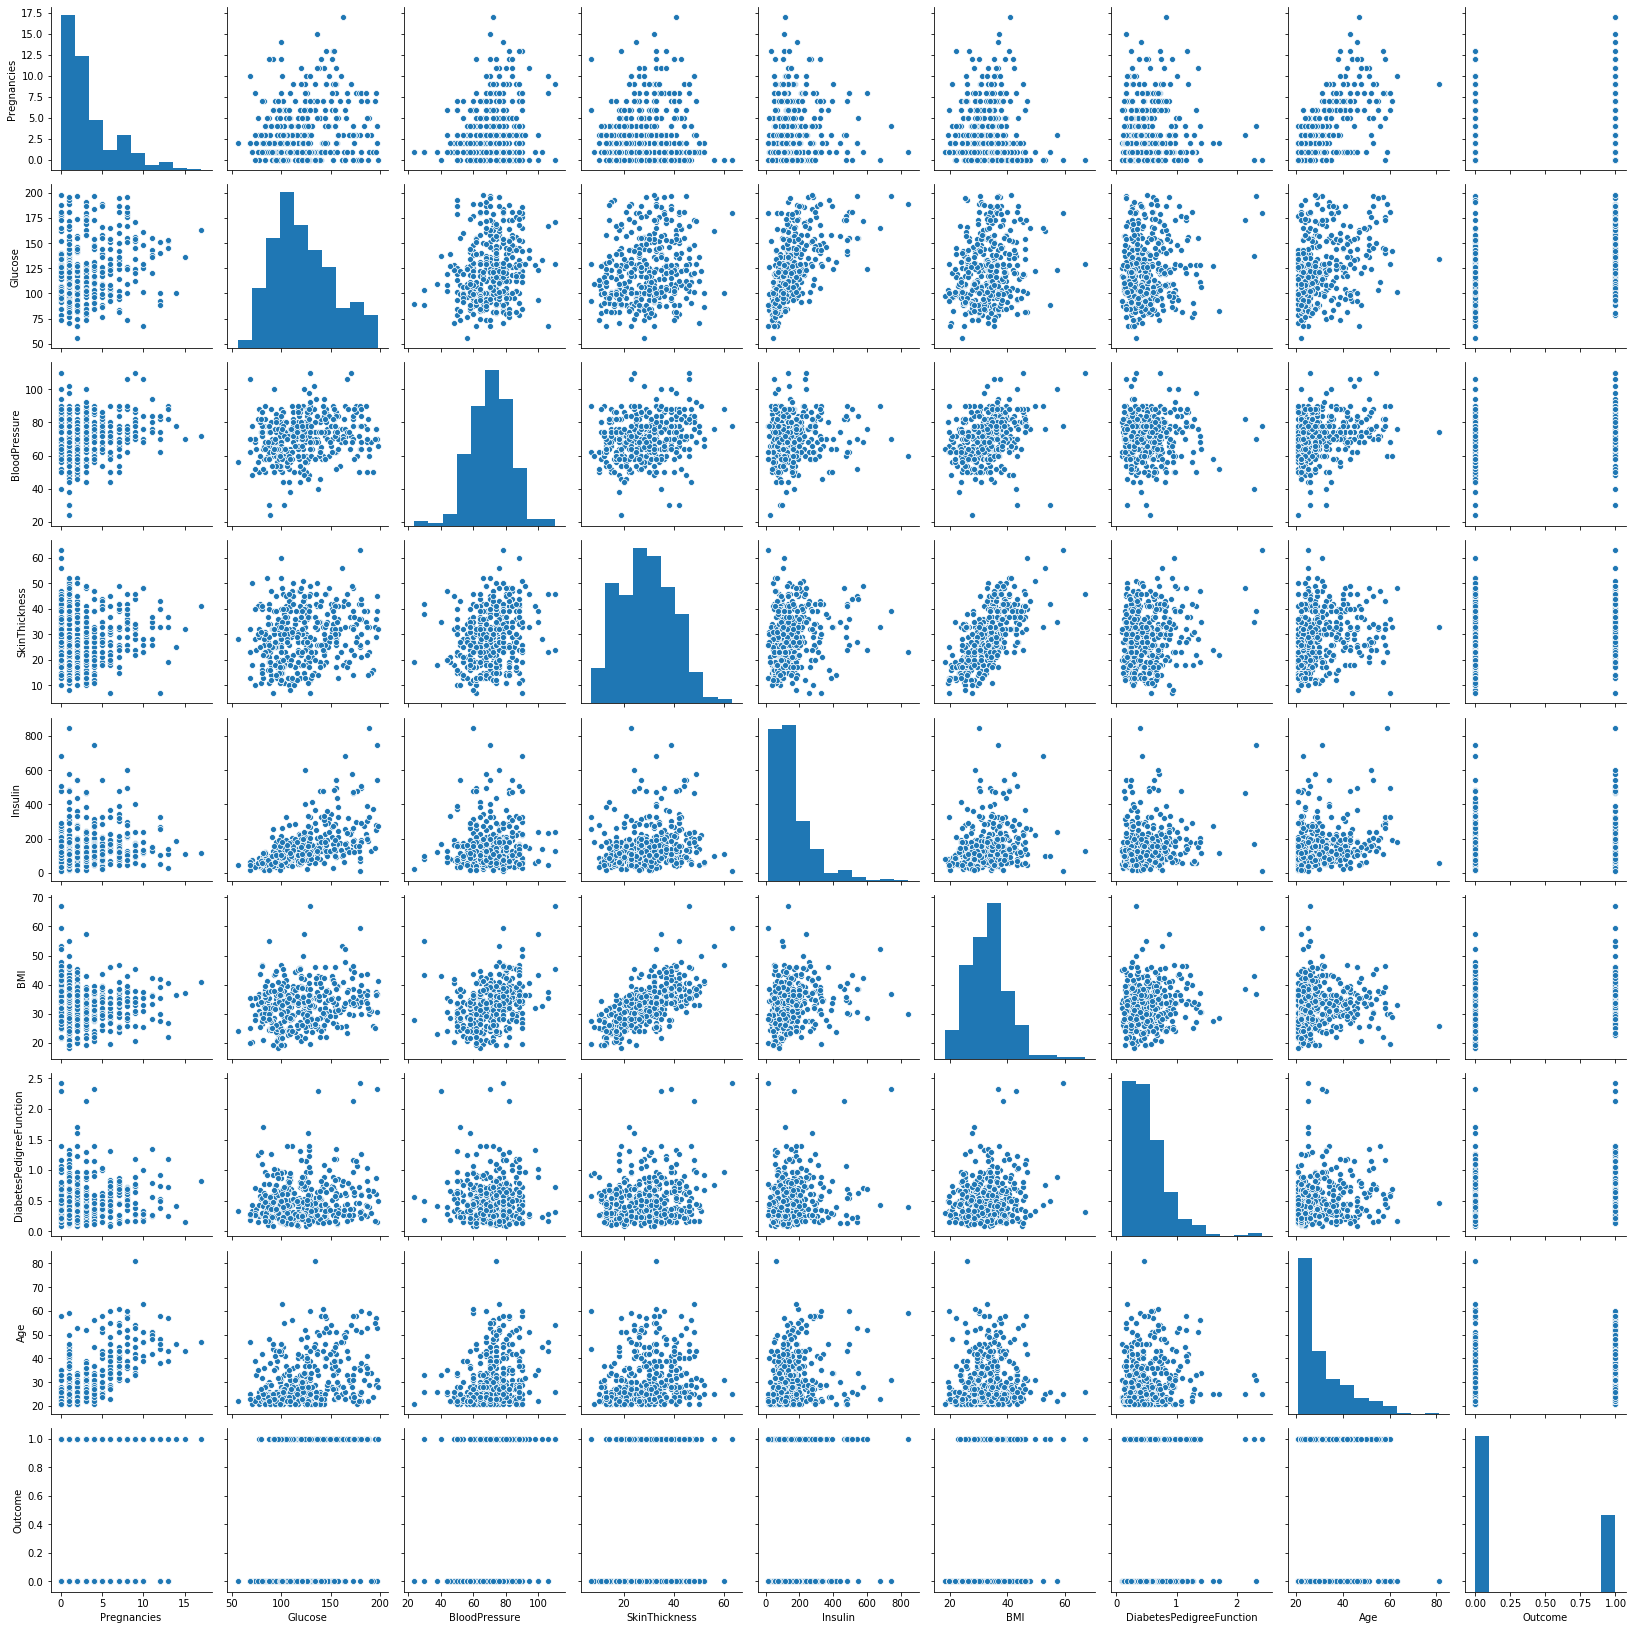

In [12]:
# Your code
clean_up = (diabetes_raw.Insulin != 0) & (diabetes_raw.BMI != 0) & (diabetes_raw.SkinThickness != 0) & (diabetes_raw.Glucose != 0)
diabetes = diabetes_raw[clean_up]
sns.pairplot(diabetes)
plt.show()

**Exercise 03:** Let us zoom into the Glucose distributions. Use Seaborn to create a new figure with two overlapping distributions showing the glucose levels in diabetics and non-diabetics. Does the plot show what we expected, i.e. a higher level of Glucose for diabetics?

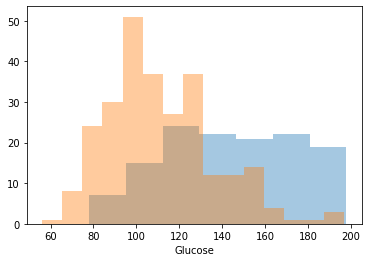

In [13]:
# Your code
diabetes_true_glucose = diabetes[diabetes.Outcome == 1]['Glucose']
diabetes_false_glucose = diabetes[diabetes.Outcome == 0]['Glucose']
sns.distplot(diabetes_true_glucose, kde=False)
sns.distplot(diabetes_false_glucose, kde=False)
plt.show()

## 7.B: Correlation analysis

We can get a quick impression of relationships between the variables by looking at the correlation coefficients between each pair of variables. The pandas `df.corr()` method allows us to compute correlations between all pairs of variables:

In [14]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


It can be helpful to visualise the correlation as a heatmap. 

**Exercise 04:**
- Plot the correlation as a heatmap, either using 2D histograms from matplotlib, or seaborn's heatmap function - an advantage of seaborn is that you can annotate the heatmap with the values of the correlation coefficient.
- Read off the correlation between Insulin and Glucose from the heatmap or the printed output above.
- Compare it to the pairplot you've just created. Is the correlation roughly what you would expect? How do we interpret this value?

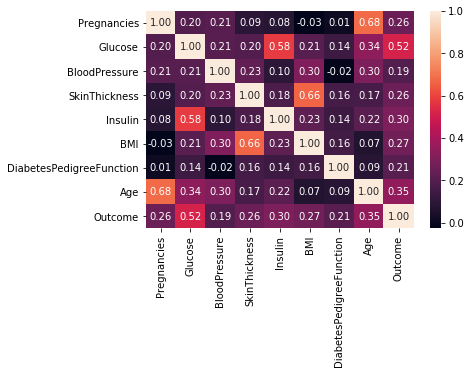

In [15]:
# Your code
sns.heatmap(diabetes.corr(), annot=True, fmt='.2f')
plt.show()

## 7.C: Linear regression

Now that we know how insulin works, we would expect the body to react with more insulin if more glucose was in the body. For this we'll use a linear regression of Insulin on Glucose.

We first need a single plot of the raw data, to compare later with our regression model.

**Exercise 05:** Create a new figure with two overlapping scatter plots, showing glucose vs insulin levels; one scatter plot for diabetic and one for non-diabetic people.

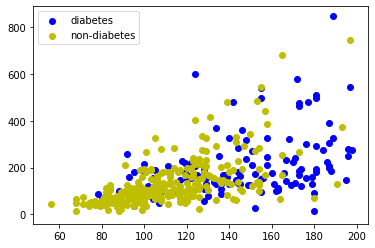

In [16]:
# Your code
# Diabetes
fig, ax = plt.subplots(1,1)
ax.scatter(diabetes[diabetes.Outcome == 1]['Glucose'], diabetes[diabetes.Outcome == 1]['Insulin'], c='b', label='diabetes')
# Non-diabetes
ax.scatter(diabetes[diabetes.Outcome == 0]['Glucose'], diabetes[diabetes.Outcome == 0]['Insulin'], c='y', label='non-diabetes')
ax.legend()
plt.show()

### C.1: Fitting the linear regression model with statmodels

We want to be able to predict the insulin level given the glucose concentration. As the output (insulin level) is continuous, we need to use a regression model. We will start by applying a linear regression model to the data.

The goal in linear regression is to compute a linear dependency between a dependent variable $y$ and a set of independent variables $\{x_1, ..., x_d\}$, such that $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2+ ... + \beta_d x_d$. 

To do this we'll use the [statsmodels](https://www.statsmodels.org/l) package, "a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration." There are other packages that implement linear regression - notably [scikit-learn](https://scikit-learn.org/stable/) - but the focus of sckit-learn is more on machine learning, and its linear regression routines do not perform all the statistical analysis done by statsmodels. Although we won't be using most of the information produced by statsmodels in this lab, later in the course (in Semester 2) when we come to investigate confidence intervals, it will be interesting to compare the results obtained by statsmodels, and those produced by your own coding.

Statsmodels has a special syntax for describing linear regression, which it shares with [R](https://www.r-project.org/), an important language for statistical analysis. For linear regression on one independent variable, the syntax `y ~ x` means "regress y on x". The function `statsmodels.formula.api.ols()` initialises an ordinary least squares (OLS) model, taking a regression formula, and a pandas dataframe in which the variables in the regression formula are columns. We can `fit()` this model, i.e. compute the regression coefficients, returning a `RegressionResults` object that we'll call `results`. 

In [21]:
model = smf.ols('Insulin ~ Glucose', data=diabetes)
results = model.fit()

**Exercise 06:**

- Use the `predict()` method of `results` to generate the fitted values $\hat y$,  and store the result in `y_hat`.
- Create a plot containing the scatter plot above, and the regression line.

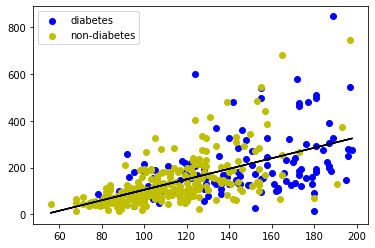

In [26]:
# Your code
# Diabetes
fig, ax = plt.subplots(1,1)
ax.scatter(diabetes[diabetes.Outcome == 1]['Glucose'], diabetes[diabetes.Outcome == 1]['Insulin'], c='b', label='diabetes')
# Non-diabetes
ax.scatter(diabetes[diabetes.Outcome == 0]['Glucose'], diabetes[diabetes.Outcome == 0]['Insulin'], c='y', label='non-diabetes')
ax.legend()
y_hat = results.predict()
ax.plot(diabetes['Glucose'], y_hat, c='black')
plt.show()

**Discussion:** What can you observe about the fit to the data?

Your answer:
Variance is low at small values of Glucose, high at large values of Glucose. 

### C.2 Numerical diagnostics

We can generate a lot of information about the regression analysis by using the `summary()` method:

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           8.51e-37
Time:                        15:16:12   Log-Likelihood:                -2347.8
No. Observations:                 392   AIC:                             4700.
Df Residuals:                     390   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -118.4125     20.064     -5.902      0.000    -157.859     -78.966
Glucose        2.2382      0.159     14.105      0.000       1.926       2.550
==============================================================================
Omnibus:                      156.630   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.860
Skew:                           1.699   Prob(JB):                    5.30e-154
Kurtosis:                       8.627   Cond. No.                         519.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we should recognise some of the things we saw in the video lectures: the coefficient of determination (`R-squared`) and adjusted coefficient of determination (`Adj. R-squared`) and also the `Intercept` and `Glucose` `coef`s (in the second part of the table) - these correspond to $\hat\beta_0$ and $\hat\beta_1$ in the linear regression model. There are lots of other measures in here; we won't worry about these for the moment.

**Discussion:** What are the values of the adjusted and unadjusted coefficients of determination and the coefficients? Are the coefficients consistent with the hypothesis that higher glucose predicts higher insulin?

Your answer:
The coef is not close to 1, so the relation is not very strong.

One thing that is missing from the summary to evaluate our model is the mean squared error (MSE) and the root mean squared error (RMSE), but we can find the MSE from the `mse_resid` property of the results:

In [28]:
MSE = results.mse_resid
RMSE = np.sqrt(MSE)
print('Mean Squared Error:', MSE)  
print('Root Mean Squared Error:', RMSE)

Mean Squared Error: 9376.17536945923
Root Mean Squared Error: 96.83065304674564


**Discussion:** Does the RMSE look to match the scale of the deviations of data points from the regression line in the figure you've just plotted?

Your answer:


### C.3 Visual diagnostics

We'll now plot a residual plot as shown in the lecture.

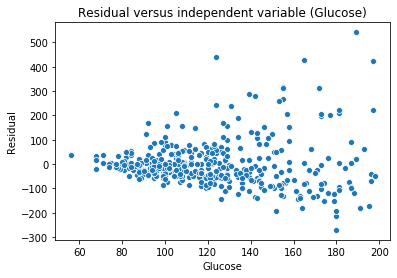

In [29]:
fig, ax = plt.subplots()
ax.set_ylabel('Residual')
ax.set_title('Residual versus independent variable (Glucose)')
scatter = sns.scatterplot(diabetes['Glucose'], results.resid)

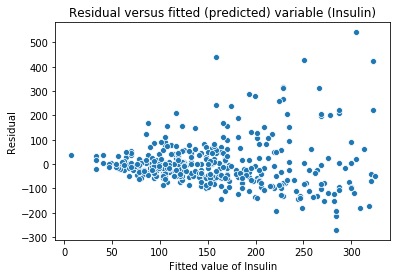

In [30]:
fig, ax = plt.subplots()
ax.set_ylabel('Residual')
ax.set_xlabel('Fitted value of Insulin')
ax.set_title('Residual versus fitted (predicted) variable (Insulin)')
scatter = sns.scatterplot(y_hat, results.resid)

**Discussion:** Which one of the two properties of residual plots shown in the lecture notes are these residuals showing?

Your answer:
Heteroscedasticity

### C.4 Linear regression with transformed variables

Let's see if we can make the plot less heteroscedastic. The problem with the second residual plot is that for smaller values of the dependent variable $y$ (`Insulin`), the residuals are smaller than for larger values of the dependent variable $y$. Taking the log of `Insulin` will tend to amplify the differences for small values of $y$ and reduce the differences for large values of $y$. We'll therefore try a log transform of `Insulin`, and fit a new model, which we'll call the `logmodel`. The first step is to create a column containing the log transform `Insulin`:

In [31]:
diabetes.insert(loc = len(diabetes.columns), column = 'LogInsulin', value = diabetes['Insulin'].apply(np.log10))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,LogInsulin
3,1,89,66,23,94,28.1,0.167,21,0,1.973128
4,0,137,40,35,168,43.1,2.288,33,1,2.225309
6,3,78,50,32,88,31.0,0.248,26,1,1.944483
8,2,197,70,45,543,30.5,0.158,53,1,2.734800
13,1,189,60,23,846,30.1,0.398,59,1,2.927370


Then we fit and plot the log model as above:

In [32]:
logmodel = smf.ols('LogInsulin ~ Glucose', data=diabetes)
logresults = logmodel.fit()

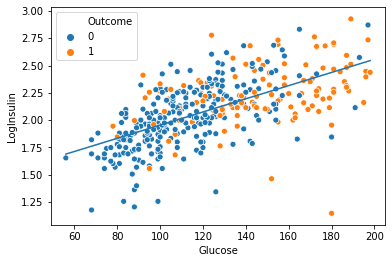

In [33]:
sns.scatterplot(data=diabetes, hue='Outcome', y='LogInsulin', x='Glucose')
sns.lineplot(diabetes['Glucose'], logresults.predict(diabetes['Glucose'])) # x = diabetes['Glucose'] and yhat = results.predict(diabetes['Glucose'])

That looks like a nicer fit, with a more even spread of the data points around the regression line. Do the residuals confirm this impression?

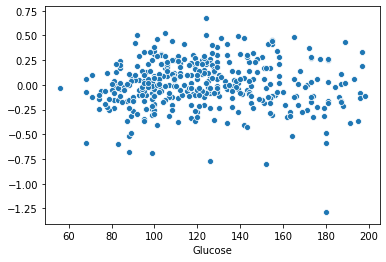

In [34]:
sns.scatterplot(diabetes['Glucose'], logresults.resid)

Yes! The variance of the residuals doesn't seem to vary much with the level of Glucose - definitely less heteroscedastic. Fantastic! The residuals do perhaps appear to have a bit of a longer negative tail - the minimum is around -1.25 and the maximum is 0.75.

Now let's look at the numerical diagnostics.

In [35]:
logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LogInsulin   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     239.4
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.90e-42
Time:                        15:36:22   Log-Likelihood:                 7.4611
No. Observations:                 392   AIC:                            -10.92
Df Residuals:                     390   BIC:                            -2.980
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3502      0.049     27.378      0.000       1.253       1.447
Glucose        0.0060      0.000     15.473      0.000       0.005       0.007
==============================================================================
Omnibus:                       44.112   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.755
Skew:                          -0.573   Prob(JB):                     1.79e-23
Kurtosis:                       5.258   Cond. No.                         519.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Discussion:**
1. How does the coefficient of determination and adjusted coefficient of determination compare to the original (untransformed) fit?
2. What are the coefficients here?

Your answer:  
1. Coefficients are larger wich means the fit is more effective.  
2. Intercept is 1.3502, gradient is 0.0060

The regression equation of $\log_{10} y$ on $x$ is:

$\log_{10} y = \beta_0 + \beta_1 x$

**Exercise 07:**

1. Rearrange this equation to give an equation for $y$ in terms of $x$
2. Now substitute in the coefficients found by the linear regression analysis above to give an equation for Insulin in terms of Glucose.

Your answer:

`LogInsulin = 1.3502 + 0.0060*Glucose`

`Insulin = 10^(1.3502)*10^(0.0060*Glucose)`

**Exercise 08:** Plot this function against the original linear fit:

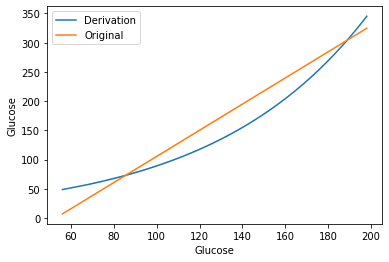

In [46]:
# Your code
Insulin_fit = (10 ** 1.3502) * (10 ** (0.0060 * diabetes['Glucose']))
sns.lineplot(diabetes['Glucose'], Insulin_fit, label='Derivation')
sns.lineplot(diabetes['Glucose'], results.predict(diabetes['Glucose']), label='Original')
plt.legend()
plt.show()

We can see the fit is similar.

There are other metrics in the summary information that indicate that this is a better fit - but we will return to this issue later in the course.

The rest of the lab is optional, however, we encourage you to at least try the first part on multiple regression, which is very short, as it gives you a deeper understanding of linear regression.

**We need your help:** This is a new course. In order for us to improve the labs for the next iterations, and to make sure that the next labs are better, we need your feedback. Please fill out the following [form](https://forms.office.com/Pages/ResponsePage.aspx?id=sAafLmkWiUWHiRCgaTTcYZmGMCx4KxlMjSTITqjdcXpURTRBS1pEVTVRUVFaNThXOTgyOVdIVzlEVS4u).

## 7.D: Optional exercises

### D.1: Multiple regression

In this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3897752/) researchers tried to figure out the factors that influenced skin thickness, in order to figure out the optimal depth to inject insulin to diabetes patients. They considered age, BMI, sex and anatomical site (i.e. where in the body). If we look at the plots from Exercise 01, we can already see that there seems to be a linear dependency between skin thickness and the BMI. However, let us inspect the data more closely.

**Exercise 09:**

Create a new figure with two scatter plots (seaborn or matplotlib, your choice). One should depict BMI vs skin thickness and the other age vs skin thickness.

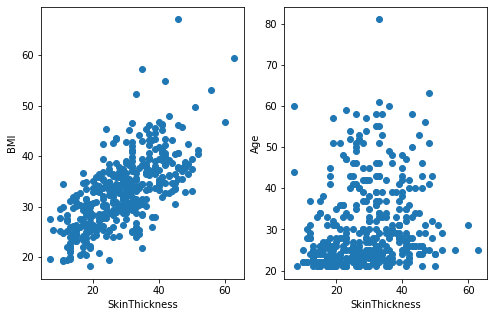

In [51]:
# Your code
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,5))
ax1.scatter(diabetes['SkinThickness'], diabetes['BMI'])
ax1.set_ylabel('BMI')
ax1.set_xlabel('SkinThickness')
ax2.scatter(diabetes['SkinThickness'], diabetes['Age'])
ax2.set_ylabel('Age')
ax2.set_xlabel('SkinThickness')
plt.show()

**Discussion:** Do you expect that linear regression will be a good model?

Your answer:  
Linear regression would work on BMI but not on Age

**Exercise 10:** Create a new instance of a linear regression model of SkinThickness on BMI, and compute the $R^2$ score between the predicted values and the actual values.

In [53]:
# Your code
BMI_SkinThickness = smf.ols('SkinThickness ~ BMI', data=diabetes)
BMI_SkinThickness_results = BMI_SkinThickness.fit()
BMI_SkinThickness_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     308.1
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.96e-51
Time:                        17:18:14   Log-Likelihood:                -1364.0
No. Observations:                 392   AIC:                             2732.
Df Residuals:                     390   BIC:                             2740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7477      1.916     -1.956      0.051      -7.514       0.018
BMI            0.9942      0.057     17.554      0.000       0.883       1.106
==============================================================================
Omnibus:                        5.129   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.320
Skew:                           0.171   Prob(JB):                        0.115
Kurtosis:                       2.615   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above, we have said that in the paper, the researchers tried to compute the effect of age, BMI, sex and anatomical site on the skin thickness. We only have the age and BMI. However, we can try to compute a 2-D linear regression.

- The syntax for regressing $y$ on $x_1$ and $x_2$ in statsmodels is:

`y ~ x1 + x2`

**Exercise 11:**
- Fit the multiple regression model (SkinThickness on Age and BMI)
- Compute the metrics for the new model.
- Did our model improve?

In [54]:
# Your code
multi_reg = smf.ols('SkinThickness ~ Age + BMI', data=diabetes)
multi_reg_results = multi_reg.fit()
multi_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.53e-52
Time:                        17:42:48   Log-Likelihood:                -1358.7
No. Observations:                 392   AIC:                             2723.
Df Residuals:                     389   BIC:                             2735.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2073      2.171     -3.320      0.001     -11.475      -2.940
Age            0.1257      0.039      3.254      0.001       0.050       0.202
BMI            0.9814      0.056     17.498      0.000       0.871       1.092
==============================================================================
Omnibus:                        3.768   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.306
Skew:                           0.144   Prob(JB):                        0.191
Kurtosis:                       2.655   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Discussion:** 

- Is our conjecture that Age doesn't have a strong influence on the skinthickness correct?

Your answer:
The coefficient is small compared to that of BMI. So the conjecture is right.

### D.2: A log-log model

**Exercise 12:** In the regression of log Insulin on Glucose, you can try log-transforming the independent variable (Glucose) too.

In [ ]:
# Your code

### D.3: Coding up regression

**Exercise 13:**. If you're curious to understand the implementation of regression, and have the time, try to implement functions `beta0, beta1 = regression(x, y)`, which returns the coefficients $\hat\beta_0$ and $\hat\beta_1$ from the data, and `yhat = predict(x, beta0, beta1)` which returns the fitted value $\hat y$. You can check it against the results from `statsmodels`.

In [ ]:
## Your code